## Installing Required Libraries

To run this practical, you need to install the following libraries:

- `tensorflow`: For building and training the model.
- `scikit-learn`: For preprocessing, splitting data, and evaluating metrics.
- `pandas`: For data manipulation.
- `numpy`: For numerical operations.
- `matplotlib`: For plotting and visualization.
- `seaborn`: For statistical data visualization.
- `tqdm`: For progress bars in loops.
- `warnings`: To suppress warnings.

You can install the required libraries using the following command:

```bash
pip install tensorflow scikit-learn pandas numpy matplotlib seaborn tqdm


In [28]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [29]:
boston = tf.keras.datasets.boston_housing

In [30]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [31]:
boston_data = boston.load_data()

In [32]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)

In [33]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [34]:
scaler = StandardScaler()

In [35]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

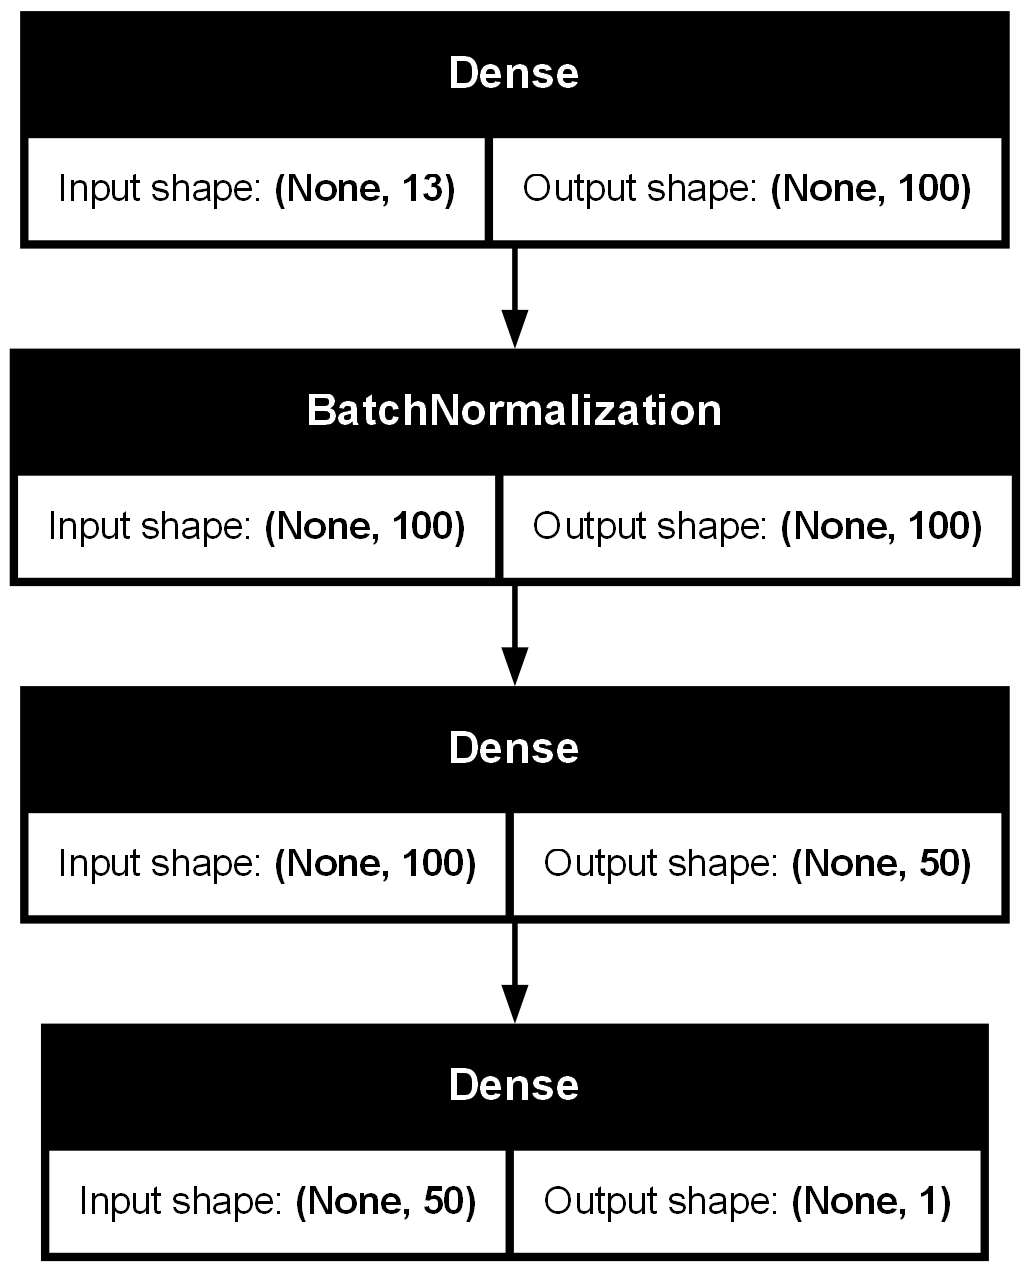

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)               │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-3 (BatchNormalization)  │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-4 (Dense)               │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [40]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [41]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - loss: 566.8323 - mae: 22.1629 - val_loss: 2276.0225 - val_mae: 44.3906
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 553.0624 - mae: 21.8922 - val_loss: 760.7358 - val_mae: 26.0684
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 529.0638 - mae: 21.7934 - val_loss: 730.8111 - val_mae: 25.5550
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 505.3246 - mae: 21.1409 - val_loss: 587.6819 - val_mae: 22.9755
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 446.5712 - mae: 20.0108 - val_loss: 544.6008 - val_mae: 22.2101
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 401.4182 - mae: 18.9521 - val_loss: 277.0042 - val_mae: 15.5007
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 300.0864 - mae: 16.2548 - val_loss: 176.4642 - val_mae: 11.9940
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 238.7083 - mae: 13.9446 - val_loss: 132.8654 - val_mae: 10.0978
Epoch 9/20
13/

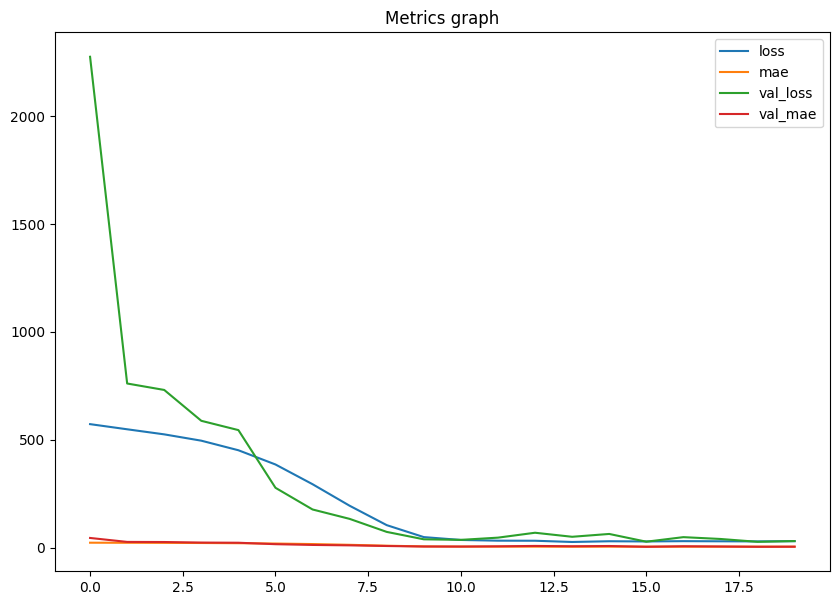

In [42]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [43]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


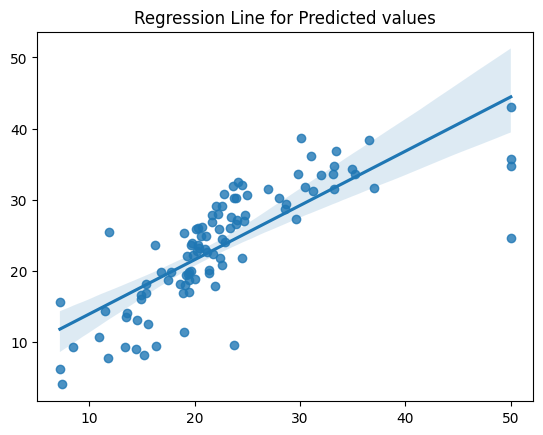

In [44]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [45]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [46]:
regression_metrics_display(y_test, y_pred)

MAE is 3.911599268165289
MSE is 29.966647836851276
R2 score is 0.5791320061003327
